In [1]:
import numpy as np
import open3d
import utils

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
pcl = np.load("source_data_22_9_8_2028/pcl_22_9_8_2028.npy")
intensity = pcl[:, 3]
x = pcl[:,0]
y = pcl[:,1]
z = pcl[:,2]
d = np.sqrt(np.square(x)+np.square(y))

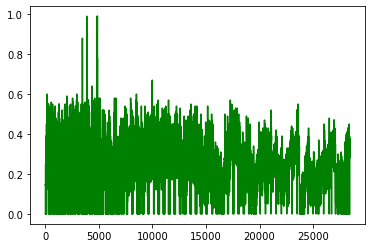

In [3]:
import matplotlib.pyplot as plt
plt.plot(intensity,"g", markersize=5)
plt.show()

In [4]:
from copy import deepcopy


pcl2 = deepcopy(pcl)
d = d[:, np.newaxis]
pcl2 = np.hstack((pcl2, d))

In [5]:
pcl3 = pcl2[np.argsort(pcl2[:, 4])]

<function matplotlib.pyplot.show(close=None, block=None)>

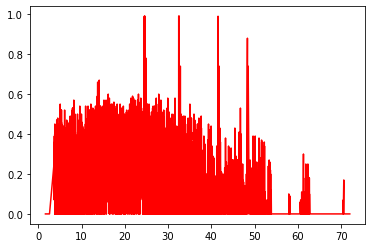

In [6]:
x = pcl3[:, 4]
y = pcl3[:, 3]
plt.plot(x, y,"r")
plt.show

In [7]:
import train
from sklearn.datasets import load_diabetes
from sklearn.utils import shuffle # 打乱数据的函数
import numpy as np

x = x[:, np.newaxis]

y = y[:, np.newaxis]
# diabetes = load_diabetes()
# data,target = diabetes.data, diabetes.target
# X, y = shuffle(data, target, random_state=13) # 固定random_state后，每次打乱的数据集都是一样的
train_data = int(x.shape[0]*0.8)
X_train, y_train = x[:train_data], y[:train_data]
X_test, y_test = x[train_data:], y[train_data:]
y_train = y_train.reshape((-1,1)) # 将target从(1，m)转变为(m,1)，其实就是转置了一下
y_test = y_test.reshape((-1,1))

# train model
loss_his, params, grads = train.train(X_train, y_train, 0.01, 1)

# predict model
y_pre = train.predict(X_test, params)



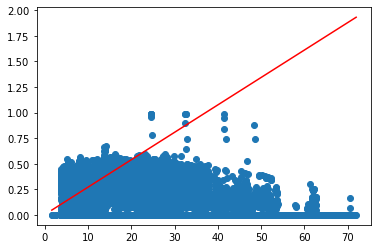

In [11]:
new_y = train.predict(x, params)
plt.plot(x, new_y,"r")
plt.scatter(x, y)
plt.show()

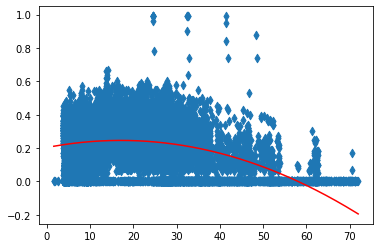

(array([[ 0.        ,  0.00501733, -0.00014656]], dtype=float32),
 array([0.2027187], dtype=float32))

In [13]:

# 用于增加一个多次项内容的模块PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression

 
# 设置最高次项为二次项，为生成二次项数据（x^2）做准备
poly_reg = PolynomialFeatures(degree=2)
 
# 将原有的X转换为一个新的二维数组X_，该二维数组包含新生成的二次项数据（x^2）和原有的一次项数据（x）。
X_ = poly_reg.fit_transform(x)
 
model = LinearRegression()
model.fit(X_,y)
 
plt.scatter(x,y, marker="d")
plt.plot(x,model.predict(X_),color='r')
plt.show()
 
model.coef_,model.intercept_